# Analysis of refugees in Spain

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Datos sacados de [Kaggle](https://www.kaggle.com/datasets/mariablancogonzalez/refugee-requests-in-spain)

In [138]:
data = pd.read_csv('AsiloEspaa.csv')

In [139]:
data = pd.DataFrame(data)

Check missing values


In [5]:
pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])

,Missing Values
Unnamed: 0,0
Nacionalidad,0
Hombres,0
Mujeres,0
Total,0
Admitidas,0
Año,0


From which countries has Spain received and admitted the highest number of refugees?

In [141]:
country_data = data.groupby('Nacionalidad ')[['Admitidas', 'Total']].sum().reset_index()

<Axes: xlabel='Nacionalidad '>

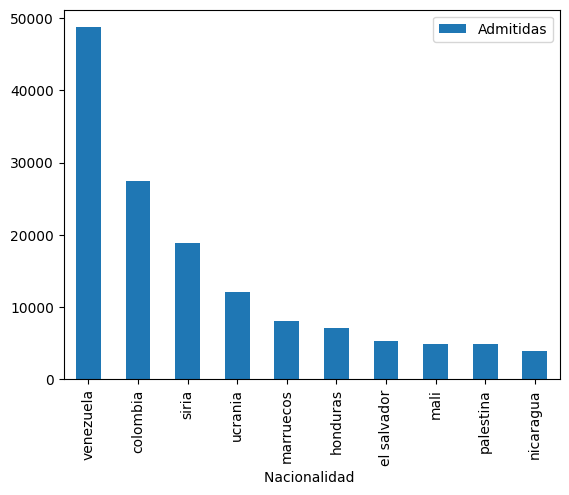

In [70]:
country_admitted = country_data.sort_values(by='Admitidas',ascending=False).head(10)
country_admitted.plot(kind='bar', x='Nacionalidad ', y='Admitidas')

<Axes: xlabel='Nacionalidad '>

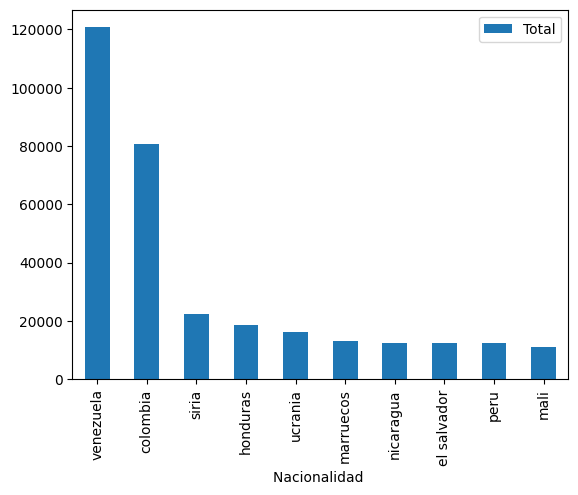

In [71]:
country_received = country_data.sort_values(by='Total',ascending=False).head(10)
country_received.plot(kind='bar', x='Nacionalidad ', y='Total')

What are the general trends in refugee statistics from 2012-2021?

In [39]:
yrly = data.groupby('Año')[['Admitidas', 'Total']].sum().reset_index().sort_values(by='Año')
yrly.reset_index(drop=True)

,Año,Admitidas,Total
0,2012,1117,1426
1,2013,3917,4513
2,2014,4896,5950
3,2015,13539,14887
4,2016,15245,16544
5,2017,29343,31740
6,2018,47740,55749
7,2019,1659,118397
8,2020,4333,88840
9,2021,65017,65589


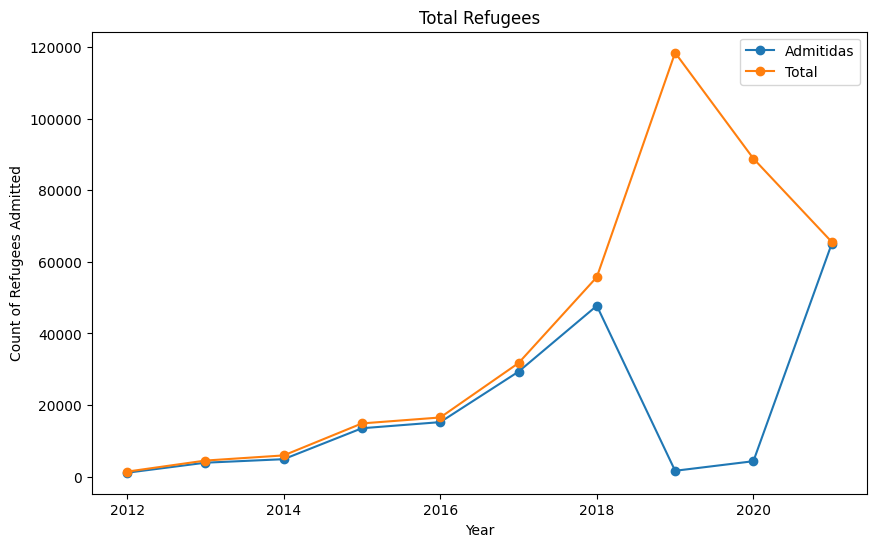

In [45]:
plt.figure(figsize=(10, 6))

plt.plot(yrly['Año'], yrly['Admitidas'], marker='o', label='Admitidas')
plt.plot(yrly['Año'], yrly['Total'], marker='o', label='Total')
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count of Refugees Admitted')
plt.title('Total Refugees')
plt.legend()

plt.show()

In [41]:
yrly_gender = data.groupby('Año')[['Hombres', 'Mujeres', 'Admitidas']].sum().reset_index()

,Año,Hombres,Mujeres,Admitidas
0,2012,1051,375,1117
1,2013,3528,985,3917
2,2014,4027,1923,4896
3,2015,9057,5830,13539
4,2016,9826,6718,15245
5,2017,18271,13469,29343
6,2018,31964,23785,47740
7,2019,64595,53802,1659
8,2020,47104,41736,4333
9,2021,41988,23601,65017


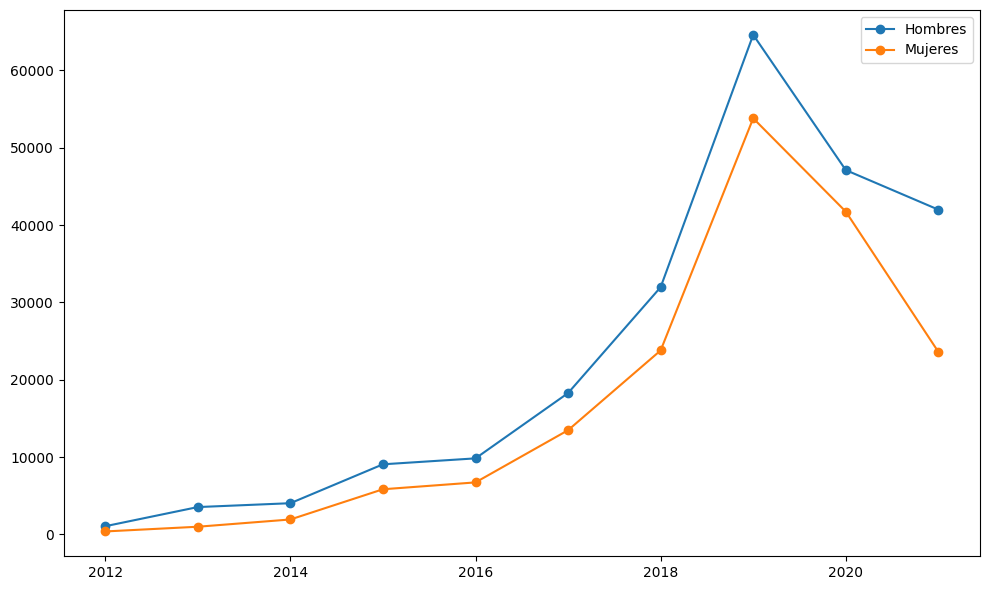

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(yrly_gender['Año'], yrly_gender['Hombres'], label='Hombres', marker='o')
plt.plot(yrly_gender['Año'], yrly_gender['Mujeres'], label='Mujeres', marker='o')

plt.tight_layout()
plt.legend()
plt.show()

hacerlo por comunidad autonoma

In [75]:
ca_data = pd.read_csv('AsiloCA.csv')

Most requested comunidades autonomas

In [103]:
top5 = ca_data.groupby('CA')['Solicitantes'].sum().reset_index().sort_values(by='Solicitantes',ascending=False).head(5)

Filter top 5 countries based on solicitantes and show their evolution

In [104]:
top5 = top5['CA']

In [108]:
ca_data.groupby(['Año','CA'])['Solicitantes'].sum()

Año   CA                
2012  Andalucía              215
      Aragón                   5
      Asturias                 9
      Cantabria               19
      Castilla La Mancha      11
                            ... 
2021  Islas Baleares         464
      Islas Canarias        5497
      Melilla               3277
      Navarra                594
      País Vasco            1725
Name: Solicitantes, Length: 182, dtype: int64

In [109]:
top5_byyear = ca_data[ca_data['CA'].isin(top5)]

In [118]:
top5_graph = top5_byyear.set_index('Año')
top5_graph = top5_graph[['CA', 'Solicitantes']].copy()

In [126]:
ca = top5_graph['CA'].unique()

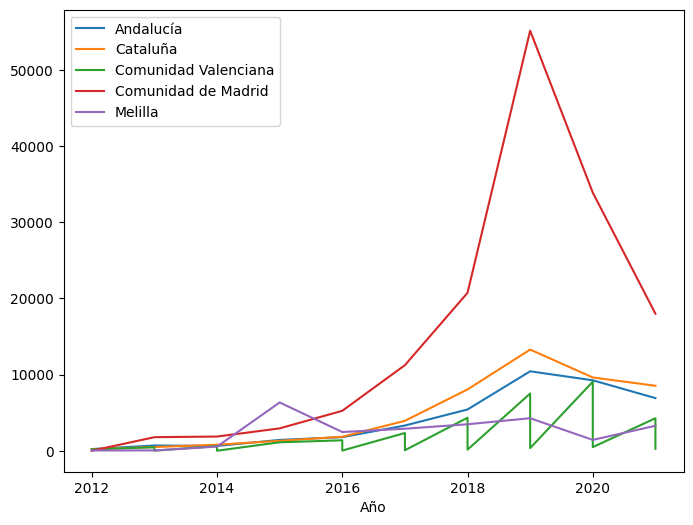

In [128]:
fig, ax = plt.subplots(figsize=(8,6))
top5_graph.groupby('CA').plot(ax = ax)
ax.legend(sorted(ca))

hacer una prediccion de cuantos en el futuro?

Train / Test split

Put year as index

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


In [151]:
data_model = data.set_index('Año')[['Total']].copy()

data_model

,Total
Año,
2012,46
2012,6
2012,17
2012,202
2012,5
...,...
2021,5
2021,15836
2021,7


In [163]:
train = data_model.loc[data_model.index < 2017]
test = data_model.loc[data_model.index >= 2017]

In [ ]:
model = ARIMA(train, order=(p, d, q))  # You need to specify the order (p, d, q) of the ARIMA model
arima_model = model.fit()

In [ ]:
predictions = arima_model.predict(start=test.index[0], end=test.index[-1], dynamic=False)
